# Bifurcaciones con el parámetro $k_2$

**Nota:** Puede tardar unos minutos en terminar de ejecutar todo

In [1]:
from model import *
from scipy.signal import find_peaks

In [2]:
m = {'1': 0.125, '2': 0.025, '3': 0.005} # g
d = {'1': 0.25, '2': 0.05, '3': 0.01} # cm
r = {'1': 0.02, '2': 0.005, '3': 0.005} # g/ms
k = {'1': 0.08, '3': 0.01, '1,2': 0.025, '2,3': 0.01} # g/ms^2
c = {'1': 3 * k['1'], '3': 3 * k['3']} # g/ms^2
a0 = {'1': 0.05, '2': 0.05, '3': 0.05} # cm^2
l = 1.4 # cm
rho = 0.00113 # g/cm^3
Ps = 0.008 # g/cm ms^2

In [3]:
y0 = [0.1, 0.1, 0.1, 0, 0, 0]
rate = 20000
t = np.linspace(0, 1000, rate + 1)

In [4]:
def get_bifurcation_values(values, init, k2_max, l_max_list, k2_min, l_min_list, k2_freq, freq_list):
    for val in values:
        k['2'] = val
        c['2'] = 3 * k['2']

        sol = odeint(model, init, t, args=(m, d, r, k, c, a0, l, Ps))
        x1, x2, x3 = sol[:, 0], sol[:, 1], sol[:, 2]

        a1 = a0['1'] + 2 * l * x1
        a2 = a0['2'] + 2 * l * x2
        a3 = a0['3'] + 2 * l * x3

        a_min = np.asarray([a1, a2, a3]).min(0)
        U = np.sqrt((2 * Ps) / rho) * a_min * np.vectorize(theta)(a_min)
        
        signals = {'x$_1$': x1, 'x$_2$': x2, 'x$_3$': x3, 'U': U}
        
        for name, signal in signals.items():
            # Calculo los últimos 20 máximos locales
            peaks_max, _ = find_peaks(signal)
            l_max = signal[peaks_max][-20:]
            k2_max[name] += [val] * l_max.size
            l_max_list[name] += list(l_max)
            
            # Calculo los últimos 20 mínimos locales
            peaks_min, _ = find_peaks(-1 * signal)
            l_min = signal[peaks_min][-20:]
            k2_min[name] += [val] * l_min.size
            l_min_list[name] += list(l_min)
            
            # Calculo la frecuencia
            fourier = np.fft.fft(signal[-7000:] - signal[-7000:].mean())
            freq = np.fft.fftfreq(fourier.size) * rate
            fourier = np.abs(fourier[0:fourier.size // 2])
            freq = freq[0:freq.size // 2]
            freq_max = 0 if np.max(fourier) < 1 else np.argmax(fourier)
            freq_list[name].append(freq[freq_max])
            k2_freq[name].append(val)
        
        init = sol[-1,:]
    return sol[-1,:]

In [5]:
k2_max = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
k2_max_rev = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
local_max = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
local_max_rev = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
k2_min = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
k2_min_rev = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
local_min = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
local_min_rev = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
k2_freq = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
k2_freq_rev = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
freq = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
freq_rev = {'x$_1$': [], 'x$_2$': [], 'x$_3$': [], 'U': []}
k2_values = np.linspace(0.008, 0.08, 100)

last = get_bifurcation_values(k2_values, y0, k2_max, local_max, k2_min, local_min, k2_freq, freq)
_ = get_bifurcation_values(k2_values[::-1], last, k2_max_rev, local_max_rev, k2_min_rev, local_min_rev, k2_freq_rev, freq_rev)

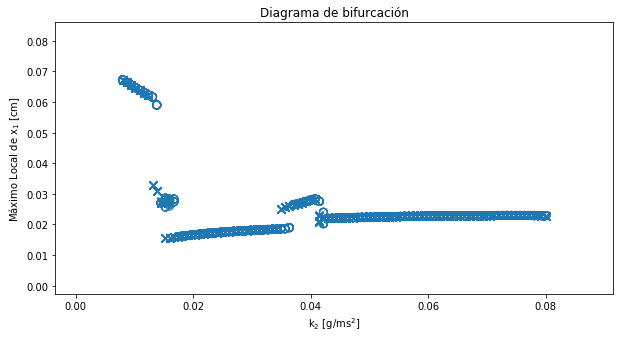

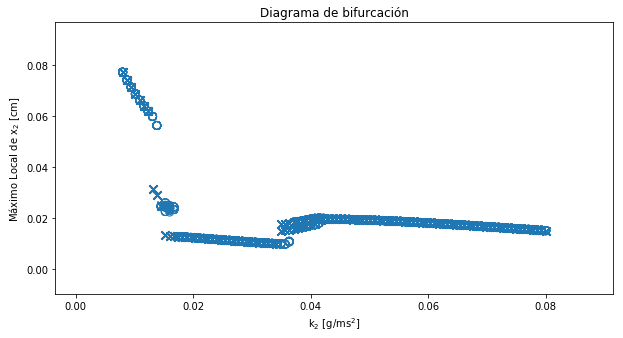

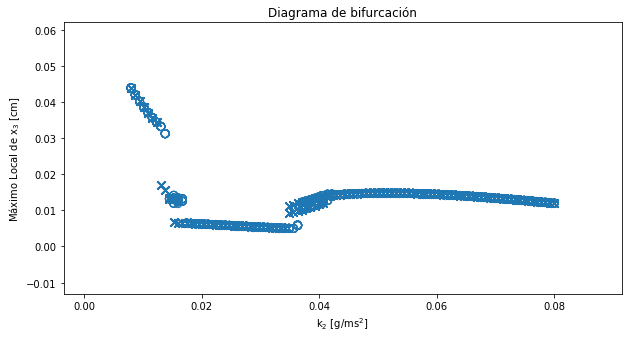

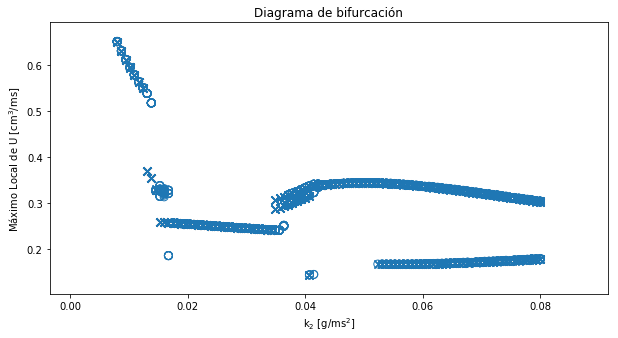

In [6]:
for name in k2_max:
    plt.figure(figsize=(10,5))
    plt.title('Diagrama de bifurcación')
    plt.xlabel('k$_2$ [g/ms$^2$]')
    plt.ylabel('Máximo Local de {} [{}]'.format(name, 'cm' if name != 'U' else 'cm$^3$/ms'))
    plt.scatter(k2_max[name], local_max[name], facecolors='none', edgecolors='C0', s=64)
    plt.scatter(k2_max_rev[name], local_max_rev[name], marker='x', s=64)
    plt.show()

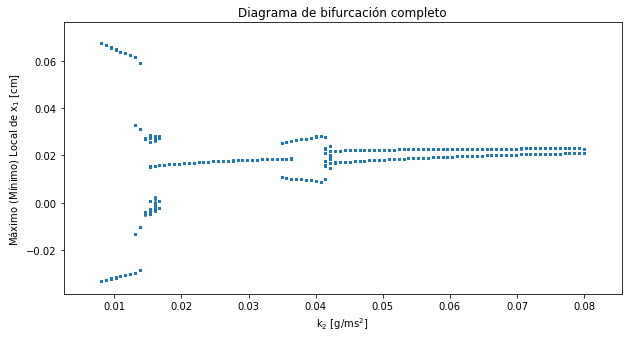

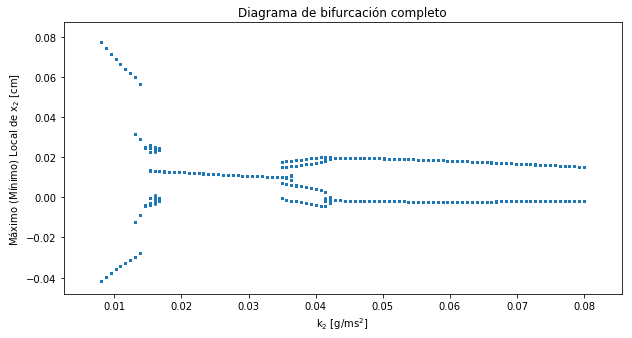

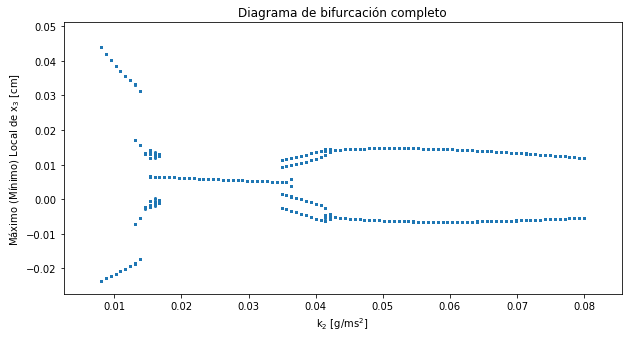

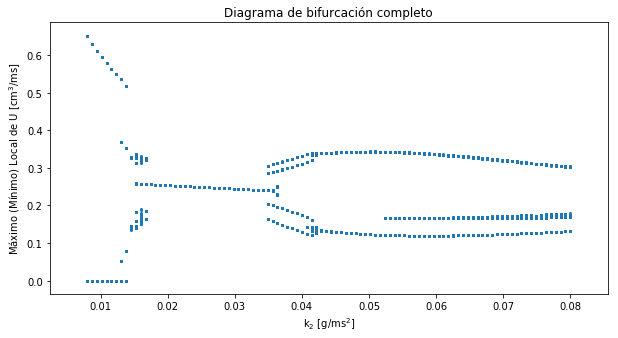

In [7]:
for name in k2_max:
    plt.figure(figsize=(10,5))
    plt.title('Diagrama de bifurcación completo')
    plt.xlabel('k$_2$ [g/ms$^2$]')
    plt.ylabel('Máximo (Mínimo) Local de {} [{}]'.format(name, 'cm' if name != 'U' else 'cm$^3$/ms'))
    plt.scatter(k2_max[name], local_max[name], marker='.', s=16)
    plt.scatter(k2_max_rev[name], local_max_rev[name], marker='.', color='C0', s=16)
    plt.scatter(k2_min[name], local_min[name], marker='.', color='C0', s=16)
    plt.scatter(k2_min_rev[name], local_min_rev[name], marker='.', color='C0', s=16)
    plt.show()

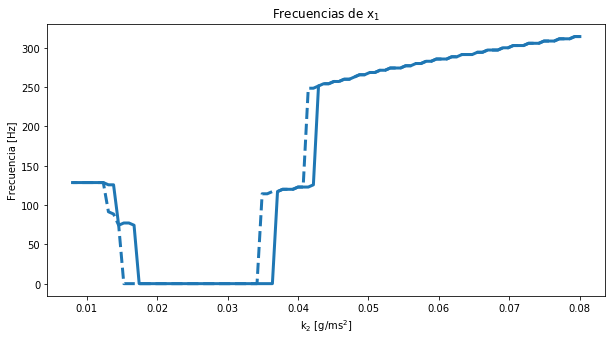

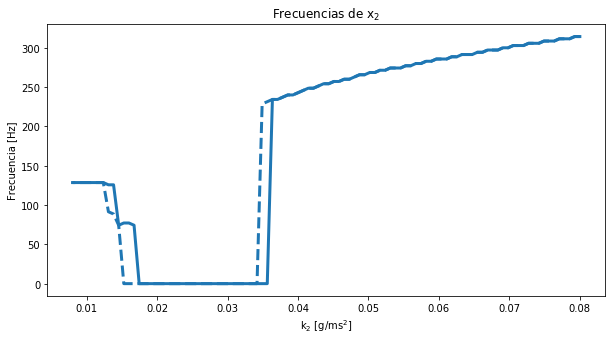

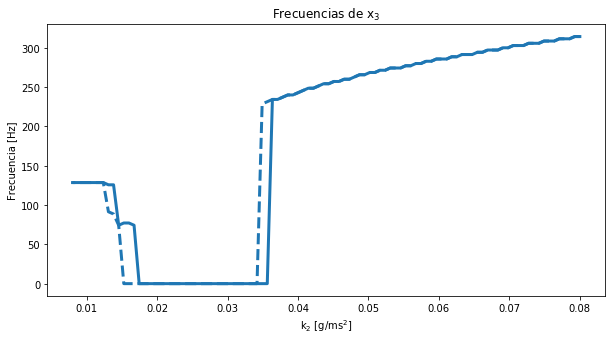

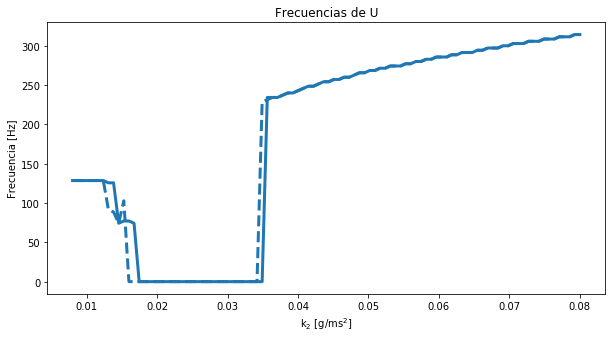

In [8]:
for name in k2_freq:
    plt.figure(figsize=(10,5))
    plt.title('Frecuencias de {}'.format(name))
    plt.xlabel('k$_2$ [g/ms$^2$]')
    plt.ylabel('Frecuencia [Hz]')
    plt.plot(k2_freq_rev[name], freq_rev[name], '--', linewidth=3)
    plt.plot(k2_freq[name], freq[name], 'C0', linewidth=3)
    plt.show()